# SKLEARN IMPLEMENTATION OF DECISION TREE AND RANDOM FORSET CLASSIFIER


&nbsp;

The decision tree and random forest classifiers where used and their key arguments where varied to produce a rnage of output.

In [2]:
import numpy as np                                                      # Import Numpy and represent it with "np"
import pandas as pd                                                     # Import Pandas and represent it with "pd"
import seaborn as sns                                                   # Import Seaborn and represent it with "sns"
import pandas_profiling                                                 # Import Panda profiler
import matplotlib.pyplot as plt                                         # IMport Pyplot from Matplotlib and represent it with "plt"
from sklearn import svm                                                 # Import Support vector machines from Sklearn
from sklearn import tree                                                # Import Tree items from in Sklearn 
from matplotlib.pyplot import figure                                    # Import Figure from Pyplot in Matplotlib 
from sklearn.tree import DecisionTreeClassifier                         # Import Decision tree classifier from tree in Sklearn 
from sklearn.ensemble import RandomForestClassifier                     # Import Random forest classifier from ensemble in Sklearn
from sklearn.model_selection import train_test_split                    # Import Train test split from model selection in Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler          # Import Label encoder and Standard Scaler from preprocessing in Sklearn
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix  # Import Acurracy score from metrics in Sklearn

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip     # Install updated version of Pandas profiler from github archive

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=8a9ec1a3dd455ad8b07c058727678e99f40da50b87c11da874fa70d822b9947d
  Stored in directory: /tmp/pip-ephem-wheel-cache-2w3two4d/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [37]:
from google.colab import files                                          # Google Colab file importer
files.upload()

Saving mushrooms.csv to mushrooms (1).csv


{'mushrooms.csv': b'p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\r\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\r\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\r\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\r\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\r\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\r\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\r\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\r\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\r\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\r\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\r\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\r\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\r\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\r\ne,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g\r\ne,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u\r\ne,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\r\np,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g\r\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u\r\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u\r\n

In [4]:
dataset = pd.read_csv('mushrooms.csv', header = 'infer', sep=',')      # Pandas used to read the file and stored as data and seperator is set to comma

In [5]:
dataset.columns = ['class','cap-shape','cap-surface','cap-color',      # Assign column names
                   'bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape',
                  'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                  'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color',
                  'ring-number','ring-type','spore-print-color','population','habitat']

In [6]:
dataset.head(10)                                                        # Sample of first 10 rows of the dataset after encoding

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g


In [9]:
profile = pandas_profiling.ProfileReport(dataset)                       # Pandas data profiler report on the dataset
profile                                                                 # Display profile report

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
dataset = pd.get_dummies(dataset).astype(int)                            # One hot encoding using Pandas get dummies and duplicating the dataset  
dataset.head()                                                           # Sample of new copy of the input feautures

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [11]:
dataset = dataset.drop(columns =['class_p'])                             # Drop column "class p" as we have two target output
dataset_py = dataset.to_numpy()                                          #  Create a copy of dataset for Python code and convert it to numpy array    

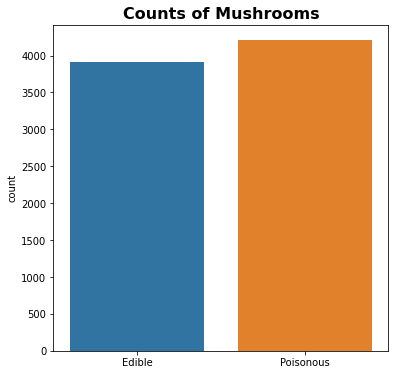

In [12]:
fig, ax = plt.subplots(figsize=(6,6))                               
f = sns.countplot(x="class_e", data=dataset)
ax.set_title("Counts of Mushrooms", fontweight="bold", fontsize=16)
ax.set_xticklabels(labels=['Edible', 'Poisonous'])
ax.set_xlabel("");

In [13]:
X = dataset.drop(columns=['class_e'],axis=1)                              # Input features of X axis is declared 
y = dataset['class_e']                                                    # Target only includes the class 

In [38]:
X.head()                                                                  # Display first five rows of input vectors

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [40]:
y.head()                                                                  # Display first five rows of Target

0    1
1    1
2    0
3    1
4    1
Name: class_e, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  # Data is shuffled and split into train and test set, 70% to 30% respectively using a seed of 2  
                                                    random_state= 2, shuffle= True)  

In [26]:
rfc_models = []                                                          # Empty model array to hold incoming Random forest classifier models
dtc_models = []                                                          # Empty model array to hold incoming Decision tree classifier models

iterators = [i for i in range(1,10)]                                     # Range to iterate from (1 to 10), to be used in tuning the models
iterators_cube = [i**3 for i in range(3,11)]                             # Range to iterate from for cube values between 27 and 1000, to be used in tuning the models
for item in iterators_cube:                                              # For every item in the iterators_cube
  iterators.append(item)                                                 # Append all items to iterators
for iterators in iterators:                                              # For all iterator in iterators  
    rfc_model = RandomForestClassifier(n_estimators=iterators)           # Random forest classifier models are created with tunable number of trees in the forest
    rfc_models.append(rfc_model)                                         # Each model appended to earlier called empty model array
    dtc_model = DecisionTreeClassifier(max_depth=iterators)              # Decision tree classifier models are created with tunable maximum depth
    dtc_models.append(dtc_model)                                         # Each model appended to earlier called empty model array

In [27]:
rfc_train_all = []                                                       # Empty array to hold incoming Random forest trained models
dtc_train_all = []                                                       # Empty array to hold incoming Decision tree trained models

for rfc_model in rfc_models:                                             # Iterator to iterate through the tuned Random forest classifier models
    rfc_train = rfc_model.fit(X_train, y_train)                          # Train model created by fitting train data into the earlier created Random forest classifier models
    rfc_train_all.append(rfc_train)                                      # Append each created model to the earlier called empty array

for dtc_model in dtc_models:                                             # Iterator to iterate through the tuned Decision tree classifier models
    dtc_train = dtc_model.fit(X_train, y_train)                          # Train model created by fitting train data into the earlier created Decision tree classifier models
    dtc_train_all.append(dtc_train)                                      # Append each created model to the earlier called empty array

In [28]:
rfc_preds = []                                                           # Empty prediction array to hold incoming predictions after being passed through the Random forest trained models 
dtc_preds = []                                                           # Empty prediction array to hold incoming predictions after being passed through the Decision tree trained models
            
for rfc_train in rfc_train_all:                                          # Iterator to iterate through the Random forest classifier trained models
    rfc_pred = rfc_train.predict(X_test)                                 # Test data passed through each trained models to get predictions for each row
    rfc_preds.append(rfc_pred)                                           # Append each set of predictions to the earlier called empty predictions array

for dtc_train in dtc_train_all:                                          # Iterator to iterate through the Decision tree classifier trained models
    dtc_pred = dtc_train.predict(X_test)                                 # Test data passed through each trained models to get predictions for each row
    dtc_preds.append(dtc_pred)                                           # Append each set of predictions to the earlier called empty predictions array

In [29]:
rfc_acc = []                                                             # Empty accuracy array to hold incoming accuracy scores for the Random forest models
dtc_acc = []                                                             # Empty accuracy array to hold incoming accuracy scores for the Decision tree models    

for dtc_pred in dtc_preds:                                               # Iterator to iterate through predictions attained via Decision tree classifier
    dtc_acc.append(accuracy_score(y_test,dtc_pred))                      # Accuracy scored is calculated by comparing predictions with test data actual results and appended to accuracy array 
print('Decision Tree Accuracy : ', dtc_acc)                              # Print Accuracy array for Decision tree classifier

for rfc_pred in rfc_preds:                                               # Iterator to iterate through predictions attained via Random forest classifier
    rfc_acc.append(accuracy_score(y_test,rfc_pred))                      # Accuracy scored is calculated by comparing predictions with test data actual results and appended to accuracy array 
print('Random Forest Accuracy : ', rfc_acc)                              # Print Accuracy array for Random forest classifier

Decision Tree Accuracy :  [0.8945424702503078, 0.9556832170701682, 0.9872794419368075, 0.9938448912597456, 0.9995896594173164, 0.9995896594173164, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Random Forest Accuracy :  [1.0, 0.9995896594173164, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [32]:
print(confusion_matrix(y_test,rfc_preds[16]))                            # Prints the confusion matrix of the test results and predictions while Utilizing the last set of predictions
print(classification_report(y_test,rfc_preds[16]))                       # Prints the classification report of the test results and the predictions

[[1137    0]
 [   0 1300]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00      1300

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [33]:
dtc_feat_importances = pd.Series(dtc_models[16].feature_importances_,    # Utilizing the last Decision tree model developed with most number of trees
                             index= X.columns)
rfc_feat_importances = pd.Series(rfc_models[16].feature_importances_,    # Utilizing the last Random forest model developed with highest maximum depth
                             index= X.columns)

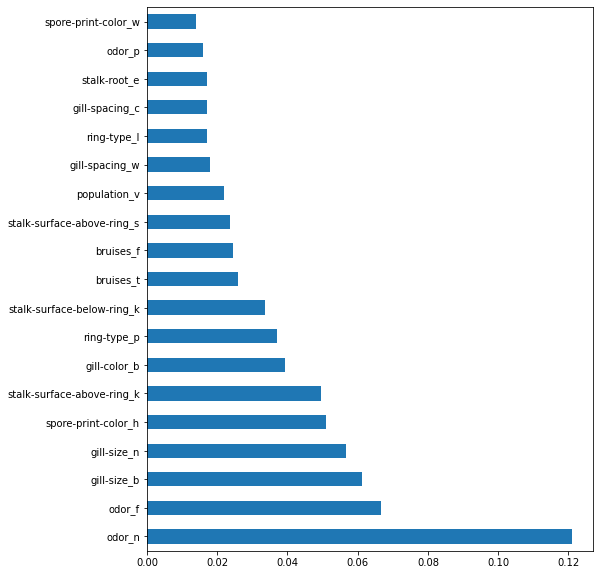

In [34]:
figure(num=None, figsize=(8, 10),facecolor='w', edgecolor='k')           # Figire characteristics are defined
rfc_feat_importances.nlargest(19).plot(kind='barh')                      # Plot feature importance of Random forest classifier

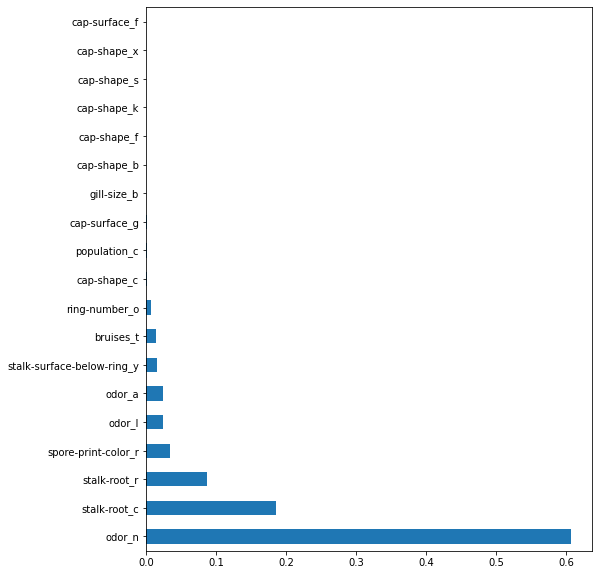

In [35]:
figure(num=None, figsize=(8, 10),facecolor='w', edgecolor='k')           # Figire characteristics are defined
dtc_feat_importances.nlargest(19).plot(kind='barh')                      # Plot feature importance of Decision tree classifier

# PYTHON CODE IMPLEMETATION FOR DECISION TREE AND RANDOM FOREST CLASSIFIER


&nbsp;

Due to amount of time it takes to run, I decieded not to iterate through the variables as it would take longer time.   

&nbsp;
The python code can be run in two different ways.

1, using the one hot encoded dataset defined earlier, "dataset_py" is to be created, it would contain 118 columns and 8123 rows, this would take hours to conclude. 

to use this uncomment the line 

```
dataset = dataset_py
```

Note : the size of the dataset to be passed can be adjusted by appending .head to the dataset, as this would pass the first 3000 rows to the dataset
```
dataset = dataset_py.head(3000)
```
&nbsp;


2, Using pythons csv loader, this would load the mushroom csv file with 22 columns and 8123 rows, this would take approximately 25 mins to conclude on Google Colab.

to use this uncomment the lines below. 

```
filename = '/content/mushrooms.csv'
dataset = load_csv(filename)    
str_column_to_int(dataset, len(dataset[0])-1, 0)
```

filename selects the file, dataset initiates the load csv function which reads the file, and string to column coverts all strings to columns and also rearranges the location of the target column
                           

&nbsp;


&nbsp;

The input variables are percentage for split, maximum number of nodes, size of the subsample, number of input features and number of trees to be used by the Random forest classifier

&nbsp;



In [ ]:
# Example of CART on the Banknote dataset
from random import seed                                                     # Import Seed for specific randomness
from random import randrange                                                # Import randrange for range of random numbers 
from csv import reader                                                      # Import CSV reader to read content of CSV file
from math import sqrt                                                       # Import square root calculator


# Load a CSV file
def load_csv(filename):                                                     # Function to load csv takes the argument filename
    dataset = list()                                                        # Empty list to hold incoming dataset
    with open(filename, 'r') as file:                                       # Open function opens the already defined file name at the bottom of the page and "R" denotes to read 
        csv_reader = reader(file)                                           # CSV reader 
        for row in csv_reader:                                              # Iterating through each row in the read file 
            if not row:                                                     # This skips missing row
                continue                                                    # Continue avoids the code from crashing
            dataset.append(row)                                             # Append all defined as rows into 
    return dataset                                                          # Returns the dataset


# Convert string column to integer
def str_column_to_int(dataset, column, col):                                # Converts all strings in the dataset to integer, takes 3 arguments : the dataset, columns to covert and target column 
    dataset = move_column(dataset, col)                                     # Initites new function to move target column, arguments are dataset and original target column and returns an updated dataset
    class_values = [row[column] for row in dataset]                         # The values of the column in defined target column are passed into an array 
    unique = set(class_values)                                              # Set is used to get only unique values in the column 
    lookup = dict()                                                         # Empty dictionary is created to hold incoming dictionary values
    for i, value in enumerate(unique):                                      # Two things required to create dictionay, the position of items in the column, and the values in the column
        lookup[value] = i                                                   # Appends items to the dictionary, using the value as key and item position as value pair
    for row in dataset:                                                     # Iterating through each row in the dataset 
        row[column] = lookup[row[column]]                                   # Each item in each row is then swapped with its value pair in the dictionary  
    return lookup                                                           # Returns a dataset not consisting of any strings

# Move position of target column to last column
def move_column(dataset, column):                                           # Function to move the target location from the defined argument to the last column, takes two arguments dataset and orignal target column 
    col_vals = [row[column] for row in dataset]                             # The values of the column in defined target column are passed into an array 
    dataset_new = []                                                        # New empty array created to hold updated dataset
    for i, value in enumerate(col_vals):                                    # Two things required for iteration, the number of items in the column, and the values in the column 
        row = [rows for rows in dataset]                                    # Iteration through the rows in the dataset is also required 
        each_row = row[i]                                                   # Using the number of items in column as a positional argument to iterate through each row in the dataset 
        col_val = col_vals[i]                                               # Using the number of items in column as a positional argument to iterate through items in the array of column values
        each_row.append(col_val)                                            # Append the original target item to the row to the end of the row  
        each_row.pop(column)                                                # Pop removes the original target item to the row from its original location in other to avoid duplication
        dataset_new.append(each_row)                                        # Appends the updated dataset with adjusted target column to the empty array created earlier
    return dataset_new                                                      # Returns the updated dataset                                                          # Returns a dataset not consisting of any strings


def train_test_split(dataset, split):                                       # Function to perform train test split, takes two arguments 
    train = list()                                                          # New empty list created to hold incoming train set
    train_size = split * len(dataset)                                       # Calculate the actual number of train items from number of rows and percentage of split defined
    test = list(dataset)                                                    # Test set is defined as the full dataset  
    while len(train) < train_size:                                          # While the size of the list train set created earlier is lower than the calculated size of train set run the lines below 
        index = randrange(len(test))                                        # Picks a random number from the total size of the test set 
        train.append(test.pop(index))                                       # Append the row of the random number picked to the train set and remove it from the test set
    return train, test                                                      # Return new train set and test set


def accuracy_metric(actual, predicted):                                     # Calculate accuracy percentage takes the actual results and system predicted results passed as arguments
    correct = 0                                                             # Value "Correct" is created and equated to zero
    for i in range(len(actual)):                                            # The number of test results to check for accuracy is gotten from the length of actual targets and used as an iterator
        if actual[i] == predicted[i]:                                       # Checks the validity of the statement, comparing the actual test set results and predicted results
            correct += 1                                                    # If statement is valid, Correct is increased in count by one
    return correct / float(len(actual)) * 100.0                             # Returns the percentage of the count of correct results to the total number of test results


def evaluate_algorithm(dataset, split, *args):                              # The program starts here, the function holds all the arguments needed to run all other functions and also initiates all other functions when needed 
    train, test = train_test_split(dataset, split)                          # First function to be called is the train test split, it passes the arguments dataset and percentage for split defined at the bottom. Returns a list for random train and test from the dataset
    test_set = list()                                                       # New empty list created to hold incoming train set without target values
    scores = list()                                                         # Empty list created to hold accuracy scores
    for row in test:                                                        # Iterating through each row in the returned test set
        row_copy = list(row)                                                # A copy of the row is created by passing it to a list
        test_set.append(row_copy)                                           # The copied row is then appended to the empty test set list created earlier
        row_copy[-1] = None                                                 # Last item in the list is changed to "None"
    predicted_dtc = decision_tree(train, test_set,                          # Predicted values are gotten from initiating the Decision tree classifier function, the function takes four arguments ; the train and test sets \n
                                  max_depth, min_size, None)                # maximum number of nodes and minimum number of training patterns (Number of input features is not used by Decision tree classifier hence set as "None")
    actual = [row[-1] for row in test]                                      # The actual value of all rows in the test set are aggregated in an array
    accuracy_dtc = accuracy_metric(actual, predicted_dtc)                   # The percentage accuracy of the Decision tree classifier is evaluated by initiating the accuracy metric function with actual and predicted results passed as arguments
    scores.append(accuracy_dtc)                                             # Appends the accuracy result of the Decision tree classifier to the scores list created earlier
    predicted_rfc = random_forest(train, test_set, *args)                   # Predicted values are gotten from initiating the Random forest classifier function
    accuracy_rfc = accuracy_metric(actual, predicted_rfc)                   # The percentage accuracy of the Random forest classifier is evaluated by initiating the accuracy metric function with actual and predicted results passed as arguments
    scores.append(accuracy_rfc)                                             # Appends the accuracy result of the Random forest classifier to the scores list created earlier
    return scores                                                           # Returns a list holding the accuracy of the Random forest classifier and the Decision tree classifier


def test_split(index2, value, dataset):                                     # Function to split dataset into two groups 
    left, right = list(), list()                                            # Empty list for both left and right groups created 
    for row in dataset:                                                     # Iterate through every row in the dataset
        if row[index2] < value:                                             # Uses the column number passed in as index to iterate through the column anc check the validity of the statement
            left.append(row)                                                # If the statement is valid, appends the row to the left part of the split
        else:                                                               # If the statement is not valid
            right.append(row)                                               # Appends the row to the right part of the split
    return left, right                                                      # returns the list of all rows in both the left and right splits


def gini_index(groups, classes):                                            # Calculate the Gini index for a split dataset 
    n_instances = float(sum([len(group) for group in groups]))              # Count all samples of both left and right split point
    gini = 0.0                                                              # Gini scores set at zero, scores would be added to it
    for group in groups:                                                    # Iterates through the two groups (left and right group)
        size = float(len(group))                                            # Gets the size of each groups
        if size == 0:                                                       # Checks the validity of the statement 
            continue                                                        # If statement is true continue in other to avoid divide by zero
        score = 0.0                                                         # Return score as zero
        for class_val in classes:                                           # Score the group based on the score for each class
            p = [row[-1] for row in group].count(class_val) / size          # Proportion formula = Counts number of occurrences for each target items and divides by the total number of items
            score += p * p                                                  # Squares the proportion
        gini += (1.0 - score) * (size / n_instances)                        # GINI Formula = Weight the group score by its relative size and sum weighted Gini index for each group
    return gini                                                             # Returns the total Gini score


def get_split(dataset, n_features):                                         # Select the best split point for a dataset while using the number of input features
    class_values = list(set(row[-1] for row in dataset))                    # Set is used to get only unique values in the target column 
    b_index, b_value, b_score, b_groups = 999, 999, 999, None               # Placeholders are created to store the attribute index, attribute value, score, and the two groups from the split
    features = list()                                                       # Creates an empty list to hold features
    if n_features == None:                                                  # Checks validity of the statement (Number of input features is not used by Decision tree classifier)
        for index in range(len(dataset[0])-1):                              # Generate a number while iterating through the size of the columns in the dataset 
            for row in dataset:                                             # Iterate through every row in the dataset
                groups = test_split(index, row[index], dataset)             # Generates two lists (left and right) by initiating the function test split, takes three arguments ; the column number, an item in the same column and the dataset 
                gini = gini_index(groups, class_values)                     # To evaluate the split the Gini index function is initiated, takes the left and right splits and unique values of target column as arguments
                if gini < b_score:                                          # If the returned Gini score validates the statement 
                    b_index,b_value,b_score,b_groups =(index, row[index],   # Update the following items
                                                        gini, groups)  
    else:                                                                   # If statement is not valid
        while len(features) < n_features:                                   # While the size of the list of features created earlier is lower than the calculated number of features run the lines below
            index = randrange(len(dataset[0])-1)                            # Select a random number within the size of the columns in the dataset 
            if index not in features:                                       # If the selected number is not in the list of features
                features.append(index)                                      # Append the row of the random number selected to features
            for index in features:                                          # Iterate through the list features
                for row in dataset:                                         # Iterate through every row in the dataset
                    groups = test_split(index, row[index], dataset)         # Generates two lists (left and right) by initiating the function test split, takes three arguments ; the column number, an item in the same column and the dataset 
                    gini = gini_index(groups, class_values)                 # To evaluate the split the Gini index function is initiated, takes the left and right splits and unique values of target column as arguments
                    if gini < b_score:                                      # If the returned Gini score validates the statement 
                        b_index,b_value,b_score,b_groups=(index,row[index], # Update the following items
                                                               gini, groups)
    return {'index':b_index, 'value':b_value, 'groups':b_groups}            # Return a dictionary that holds the attribute index, attribute value, and the two groups from the split


def to_terminal(group):                                                     # To terminal function, in other to deduce the result of a split, takes the last split of either left or right split or both  
    outcomes = [row[-1] for row in group]                                   # Selects items in the target row of the either the left or right split or both
    return max(set(outcomes), key=outcomes.count)                           # Returns the most target value in the target row, "set" selects only the unique target values and "key" counts the frequency of target values, the most it then returned


def split(node, max_depth, min_size, depth):                                # Split function initiated with arguments root, maximum number of nodes, minimum number of training patterns and current depth
    left, right = node['groups']                                            # List of all rows in both the left and right splits taken from the groups
    del(node['groups'])                                                     # Delete the groups from the dictionary
    if not left or not right:                                               # Statement checks if either left or right split is empty
        node['left'] = node['right'] = to_terminal(left + right)            # If statement is valid for any of the split, to terminal function is initiated, which takes the last split of either left or right split or both
        return                                                              # Return whatever is returned from the To Terminal function
    if depth >= max_depth:                                                  # Statement checks if the stipulated maximum number of nodes has been attained  
        node['left'], node['right'] = to_terminal(left), to_terminal(right) # If statement is valid for any of the split, to terminal function is initiated, which takes the last split of either left or right split
        return                                                              # Return whatever is returned from the To Terminal function
    if len(left) <= min_size:                                               # Statement checks if the stipulated minimum number of training patterns has been attained by the left split
        node['left'] = to_terminal(left)                                    # If statement is valid, to terminal function is initiated and the left split is passed as the argument
    else:                                                                   # If statement is not valid
        node['left'] = get_split(left, n_features)                          # The Left split is split again by initiating the get split function and the left split is passed as the argument
        split(node['left'], max_depth, min_size, depth+1)                   # Then the split function is initiated all over again with arguments root, maximum number of nodes, minimum number of training patterns and current depth
    if len(right) <= min_size:                                              # Statement checks if the stipulated minimum number of training patterns has been attained by the right split
        node['right'] = to_terminal(right)                                  # If statement is valid, to terminal function is initiated and the right split is passed as the argument
    else:                                                                   # If statement is not valid
        node['right'] = get_split(right, n_features)                        # The right split is split again by initiating the get split function and the left split is passed as the argument
        split(node['right'], max_depth, min_size, depth+1)                  # Then the split function is initiated all over again with arguments root, maximum number of nodes, minimum number of training patterns and current depth


def build_tree(train, max_depth, min_size, n_features):                     # Function to build the decision tree
    root = get_split(train, n_features)                                     # Gets the location to perform a split to be recorded as root, root contains ; attribute index, attribute value and the two groups from the split
    split(root, max_depth, min_size, 1)                                     # Split function initiated with arguments root, maximum number of nodes, minimum number of training patterns and current depth
    return root                                                             # Returns the items stored as root to the decision tree function


def predict(node, row):                                                     # Function to make prediction on each row of the test set, with argument tree design and row to be prediction
    if row[node['index']] < node['value']:                                  # Checks the validity of the statement by comparing the dictionary node of attribute index and attribute value 
        if isinstance(node['left'], dict):                                  # If statement is valid, perform a check if the left split is a subclass of the dictionary
            return predict(node['left'], row)                               # If statement is valid, perform the predict again on the left split by initiating the predict function and passing the left split and same row as arguments
        else:                                                               # if statement is not valid, i.e. not a subclass of the dictionary 
            return node['left']                                             # Return the left split, which would turn out to be the target result as it is neither a group nor can it be split 
    else:                                                                   # if statement is not valid, i.e. the comparison between the dictionary node of attribute index and attribute value
        if isinstance(node['right'], dict):                                 # If statement is valid, perform a check if the right split is a subclass of the dictionary
            return predict(node['right'], row)                              # If statement is valid, perform the predict again on the left split by initiating the predict function and passing the right split and same row as arguments
        else:                                                               # if statement is not valid, i.e. not a subclass of the dictionary 
            return node['right']                                            # Return the right split, which would turn out to be the target result as it is neither a group nor can it be split


def decision_tree(train, test, max_depth, min_size, n_features):            # The decision tree function takes the arguments ; train and test sets, maximum number of nodes, minimum number of training patterns and number of input features
    tree = build_tree(train, max_depth, min_size, n_features)               # Function to build the root of the tree 
    predictions = list()                                                    # New empty list created to hold predictions from the test sets
    for row in test:                                                        # For every row in the test set
        prediction = predict(tree, row)                                     # To make predictions on the test set, the tree and rows are passed as arguments to the predict function
        predictions.append(prediction)                                      # Each results from the prediction function is appended to the earlier created empty list called predictions
    return(predictions)                                                     # Returns all predictions to the evaluate algorithm  


def subsample(dataset, ratio):                                              # Create a random subsample from the dataset with replacement, using the train set and number of input features
    sample = list()                                                         # New empty list created to hold samples from the test sets
    n_sample = round(len(dataset) * ratio)                                  # Number of samples is a multiple of both arguments
    while len(sample) < n_sample:                                           # While the size of the list of samples created earlier is lower than the calculated number of samples run the lines below
        index = randrange(len(dataset))                                     # Select a random number within the size of the columns in the dataset 
        sample.append(dataset[index])                                       # Append the row of the random number picked to the sample list
    return sample                                                           # Returns the list "sample"


def bagging_predict(trees, row):                                            # Function used to make a prediction with a list of decision trees
    predictions = [predict(tree, row) for tree in trees]                    # To make predictions on the test set, the tree and rows are passed as arguments to the predict function for every tree in defined number of trees
    return max(set(predictions), key=predictions.count)                     # Returns the most predicted value from "predictions", "set" selects only the unique values in predictions and "key" counts the frequency of each values, the most it then returned


def random_forest(train, test, max_depth, min_size, sample_size,            # The random forest function takes the arguments ; train and test sets, maximum number of nodes, minimum number of training patterns and number of input features
                  n_trees, n_features):                                     # sample size, number of trees in the forest, and number of input features
    trees = list()                                                          # New empty list created to hold list of all trees or nodes created
    for i in range(n_trees):                                                # Iterate through the number of trees
        sample = subsample(train, sample_size)                              # Subsample function is initiated to make a subsample of the training dataset, by passing the train set and number of input features 
        tree = build_tree(sample, max_depth, min_size, n_features)          # Function to build the root of the tree 
        trees.append(tree)                                                  # Appends new tree to the list of trees
    predictions = [bagging_predict(trees, row) for row in test]             # To make predictions on the test set, the tree and each row in the test set are passed as arguments to the predict function
    return(predictions)                                                     # Returns all predictions to the evaluate algorithm 






dataset = dataset_py                                                        # dataset placeholder 


                      
# filename = '/content/mushrooms.csv'                                         # Load and prepare data               
# dataset = load_csv(filename)                                                # Loaded file is tagged "dataset"
# str_column_to_int(dataset, len(dataset[0])-1, 0)                            # Function to convert strings in column to integers is initiated, takes two arguments the dataset and its size, third argument is target output to be moved


seed(1)                                                                     # Using a specified randomness of 1
split_per = 0.7                                                             # Percentage for split is defined
max_depth = 2                                                               # maximum number of nodes is defined 
min_size = 10                                                               # minimum number of training patterns is defined
sample_size = 1.0                                                           # Size of the subsample is defined
n_features = int(sqrt( len(dataset[0])-1))                                  # Number of input features is defined
n_trees = 10                                                                # Number of trees to be used by the Random forest classifier is defined

accuracy = evaluate_algorithm(dataset, split_per, max_depth, min_size,      # Accuracy of the classifiers is calculated and returned after comparing the actual test set target values to the predicted test set target values
    sample_size, n_trees, n_features)   
print('Decision Tree Accuracy : ', str(round(accuracy[0], 2)) + '%')        # Print Accuracy array for Decision tree classifier
print('Random Forest Accuracy : ', str(round(accuracy[1], 2)) + '%')        # Print Accuracy array for Random Forest classifier


# CHEERS!!!